# AQI: Air quality index modeling - regression

Used air info which describes AQI index from Beijing 12 stations.   
Compared four regression methods performance. Linear Regression, Decision Tree Regression, Random Forest Regression and Ensemble Extra Tree Regression. Finally, The performance of Ensemble method was the best

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

sns.set_style()

In [4]:
## The several air info can describe AQI index of Beijing from 12 station.
data = pd.read_csv('train.csv')
data

,datetime,STATIONNAME,AQI,PM2.5,PM10,NO2,O3,CO,SO2
0,2015/1/2 1:00,A1,145.0,111.0,140.0,102.0,2.0,2.7,61.0
1,2015/1/2 1:00,A2,130.0,99.0,177.0,64.0,16.0,3.0,44.0
2,2015/1/2 1:00,A3,85.0,34.0,120.0,10.0,56.0,0.4,10.0
3,2015/1/2 1:00,A4,109.0,82.0,154.0,90.0,5.0,3.4,46.0
4,2015/1/2 1:00,A5,127.0,96.0,132.0,89.0,4.0,3.4,62.0
...,...,...,...,...,...,...,...,...,...
65455,2015/8/31 23:00,A8,19.0,5.0,5.0,2.0,58.0,0.5,2.0
65456,2015/8/31 23:00,A9,24.0,9.0,NaN,17.0,75.0,0.5,2.0
65457,2015/8/31 23:00,A10,21.0,6.0,18.0,5.0,66.0,0.4,2.0
65458,2015/8/31 23:00,A11,22.0,8.0,NaN,26.0,70.0,0.6,2.0


# Data exploration

In [6]:
data.describe()

,AQI,PM2.5,PM10,NO2,O3,CO,SO2
count,64118.000000,63368.000000,46308.000000,63247.000000,63563.000000,63760.000000,63752.000000
mean,104.692848,71.916709,108.114775,44.157051,71.874156,1.098774,14.379455
std,80.137977,66.828762,92.643884,31.447167,60.516739,1.036241,19.299763
min,4.000000,3.000000,5.000000,2.000000,2.000000,0.100000,2.000000
25%,44.000000,21.000000,43.000000,20.000000,25.000000,0.500000,2.000000
50%,84.000000,52.000000,88.000000,36.000000,62.000000,0.800000,6.000000
75%,139.000000,102.000000,147.000000,62.000000,98.000000,1.300000,18.000000
max,500.000000,762.000000,1040.000000,214.000000,423.000000,14.000000,500.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65460 entries, 0 to 65459
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     65460 non-null  object 
 1   STATIONNAME  65460 non-null  object 
 2   AQI          64118 non-null  float64
 3   PM2.5        63368 non-null  float64
 4   PM10         46308 non-null  float64
 5   NO2          63247 non-null  float64
 6   O3           63563 non-null  float64
 7   CO           63760 non-null  float64
 8   SO2          63752 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.5+ MB


In [11]:
temp = pd.DatetimeIndex(data['datetime'])
data['date'] = temp.date
data['time'] = temp.time
data['month'] = temp.month
data['day'] = temp.day
data['hour'] = temp.hour
data['week'] = temp.weekofyear
data

C:\Users\sunya\AppData\Local\Temp/ipykernel_20108/219017487.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data['week'] = temp.weekofyear


,datetime,STATIONNAME,AQI,PM2.5,PM10,NO2,O3,CO,SO2,date,time,month,day,hour,week
0,2015/1/2 1:00,A1,145.0,111.0,140.0,102.0,2.0,2.7,61.0,2015-01-02,01:00:00,1,2,1,1
1,2015/1/2 1:00,A2,130.0,99.0,177.0,64.0,16.0,3.0,44.0,2015-01-02,01:00:00,1,2,1,1
2,2015/1/2 1:00,A3,85.0,34.0,120.0,10.0,56.0,0.4,10.0,2015-01-02,01:00:00,1,2,1,1
3,2015/1/2 1:00,A4,109.0,82.0,154.0,90.0,5.0,3.4,46.0,2015-01-02,01:00:00,1,2,1,1
4,2015/1/2 1:00,A5,127.0,96.0,132.0,89.0,4.0,3.4,62.0,2015-01-02,01:00:00,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65455,2015/8/31 23:00,A8,19.0,5.0,5.0,2.0,58.0,0.5,2.0,2015-08-31,23:00:00,8,31,23,36
65456,2015/8/31 23:00,A9,24.0,9.0,NaN,17.0,75.0,0.5,2.0,2015-08-31,23:00:00,8,31,23,36
65457,2015/8/31 23:00,A10,21.0,6.0,18.0,5.0,66.0,0.4,2.0,2015-08-31,23:00:00,8,31,23,36
65458,2015/8/31 23:00,A11,22.0,8.0,NaN,26.0,70.0,0.6,2.0,2015-08-31,23:00:00,8,31,23,36


In [16]:
data_A3 = data[data['STATIONNAME'].str.contains('A3')]
data_A3

,datetime,STATIONNAME,AQI,PM2.5,PM10,NO2,O3,CO,SO2,date,time,month,day,hour,week
2,2015/1/2 1:00,A3,85.0,34.0,120.0,10.0,56.0,0.4,10.0,2015-01-02,01:00:00,1,2,1,1
14,2015/1/2 2:00,A3,73.0,15.0,96.0,4.0,66.0,0.2,4.0,2015-01-02,02:00:00,1,2,2,1
26,2015/1/2 3:00,A3,67.0,13.0,83.0,4.0,67.0,0.3,5.0,2015-01-02,03:00:00,1,2,3,1
38,2015/1/2 4:00,A3,52.0,10.0,53.0,6.0,61.0,0.2,13.0,2015-01-02,04:00:00,1,2,4,1
50,2015/1/2 5:00,A3,34.0,8.0,34.0,6.0,60.0,0.2,16.0,2015-01-02,05:00:00,1,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65402,2015/8/31 19:00,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-31,19:00:00,8,31,19,36
65414,2015/8/31 20:00,A3,26.0,NaN,NaN,5.0,81.0,0.1,4.0,2015-08-31,20:00:00,8,31,20,36
65426,2015/8/31 21:00,A3,23.0,5.0,21.0,4.0,73.0,0.1,4.0,2015-08-31,21:00:00,8,31,21,36
65438,2015/8/31 22:00,A3,20.0,7.0,17.0,5.0,61.0,0.1,4.0,2015-08-31,22:00:00,8,31,22,36


Text(0.5, 1.0, 'Trend of AQI')

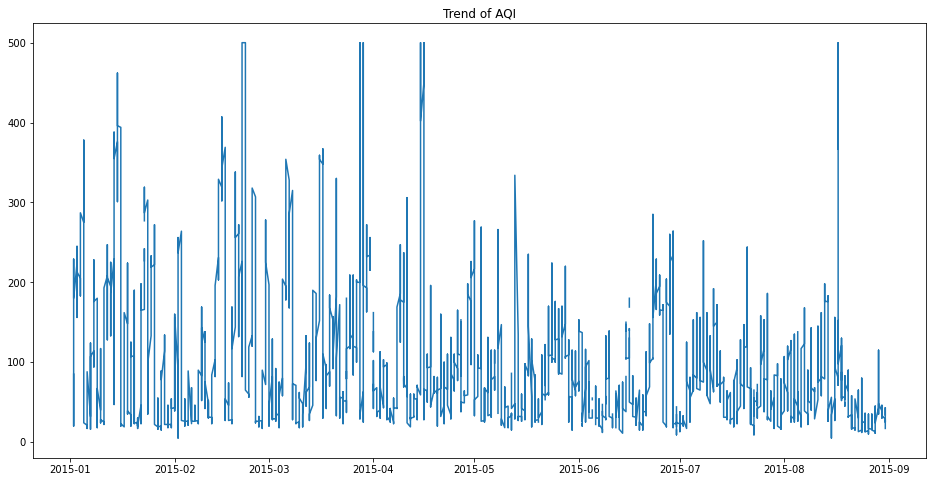

In [17]:
plt.figure(figsize=(16,8))
plt.plot(data_A3['date'], data_A3['AQI'])
plt.title('Trend of AQI')

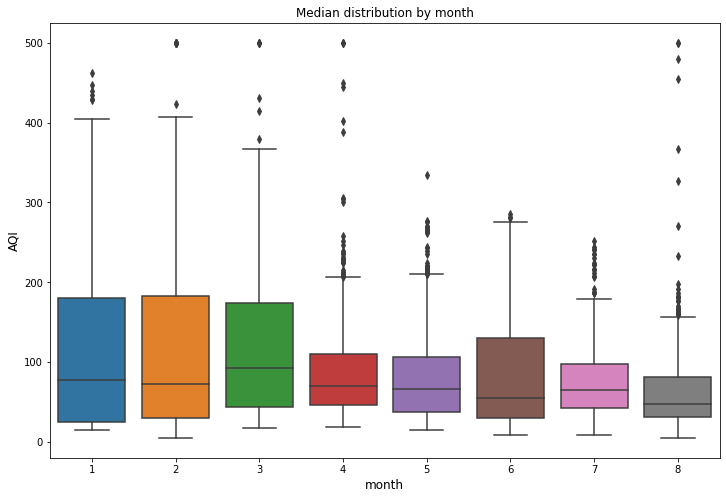

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(x='month', y='AQI',data=data_A3)
plt.ylabel("AQI", fontsize=12)
plt.xlabel("month", fontsize=12)
plt.title('Median distribution by month')
plt.show()

## month

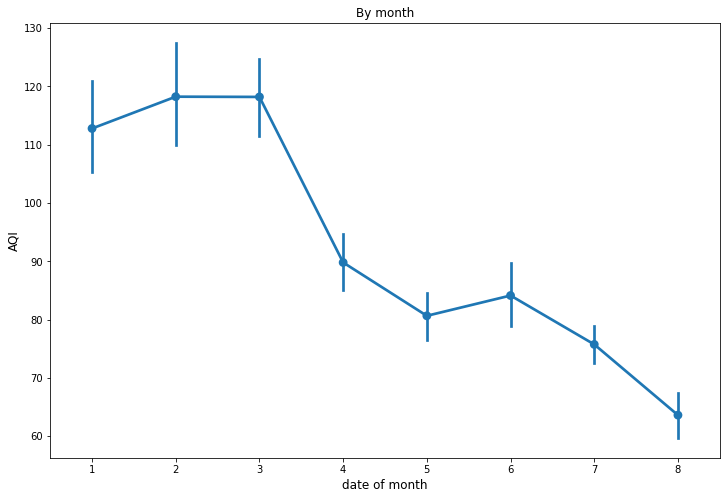

In [22]:
plt.figure(figsize=(12,8))
sns.pointplot(x='month', y='AQI',data=data_A3)
plt.ylabel("AQI", fontsize=12)
plt.xlabel("date of month", fontsize=12)
plt.title('By month')
plt.show()

## one day 

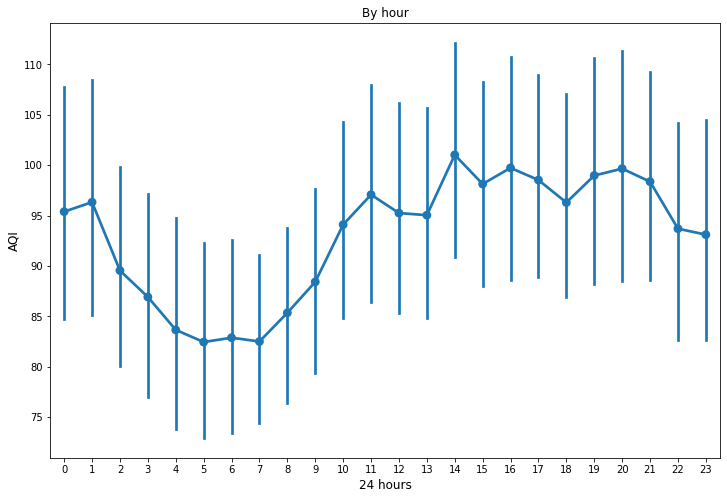

In [23]:
plt.figure(figsize=(12,8))
sns.pointplot(x='hour', y='AQI',data=data_A3)
plt.ylabel("AQI", fontsize=12)
plt.xlabel("24 hours", fontsize=12)
plt.title('By hour')
plt.show()

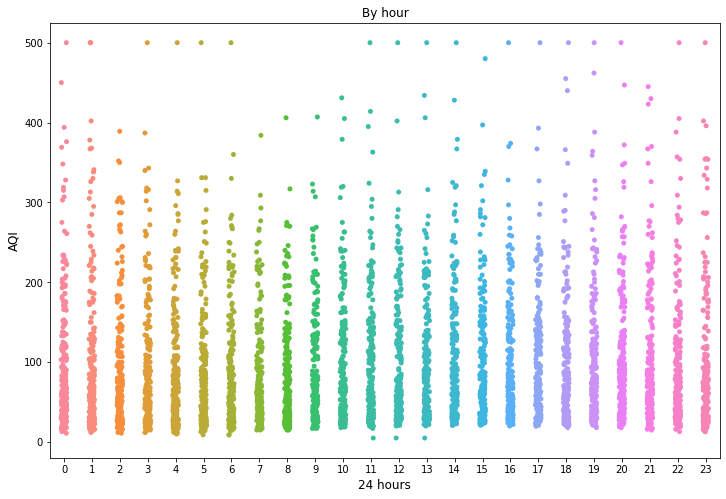

In [24]:
plt.figure(figsize=(12,8))
sns.stripplot(x='hour', y='AQI',data=data_A3)
plt.ylabel("AQI", fontsize=12)
plt.xlabel("24 hours", fontsize=12)
plt.title('By hour')
plt.show()

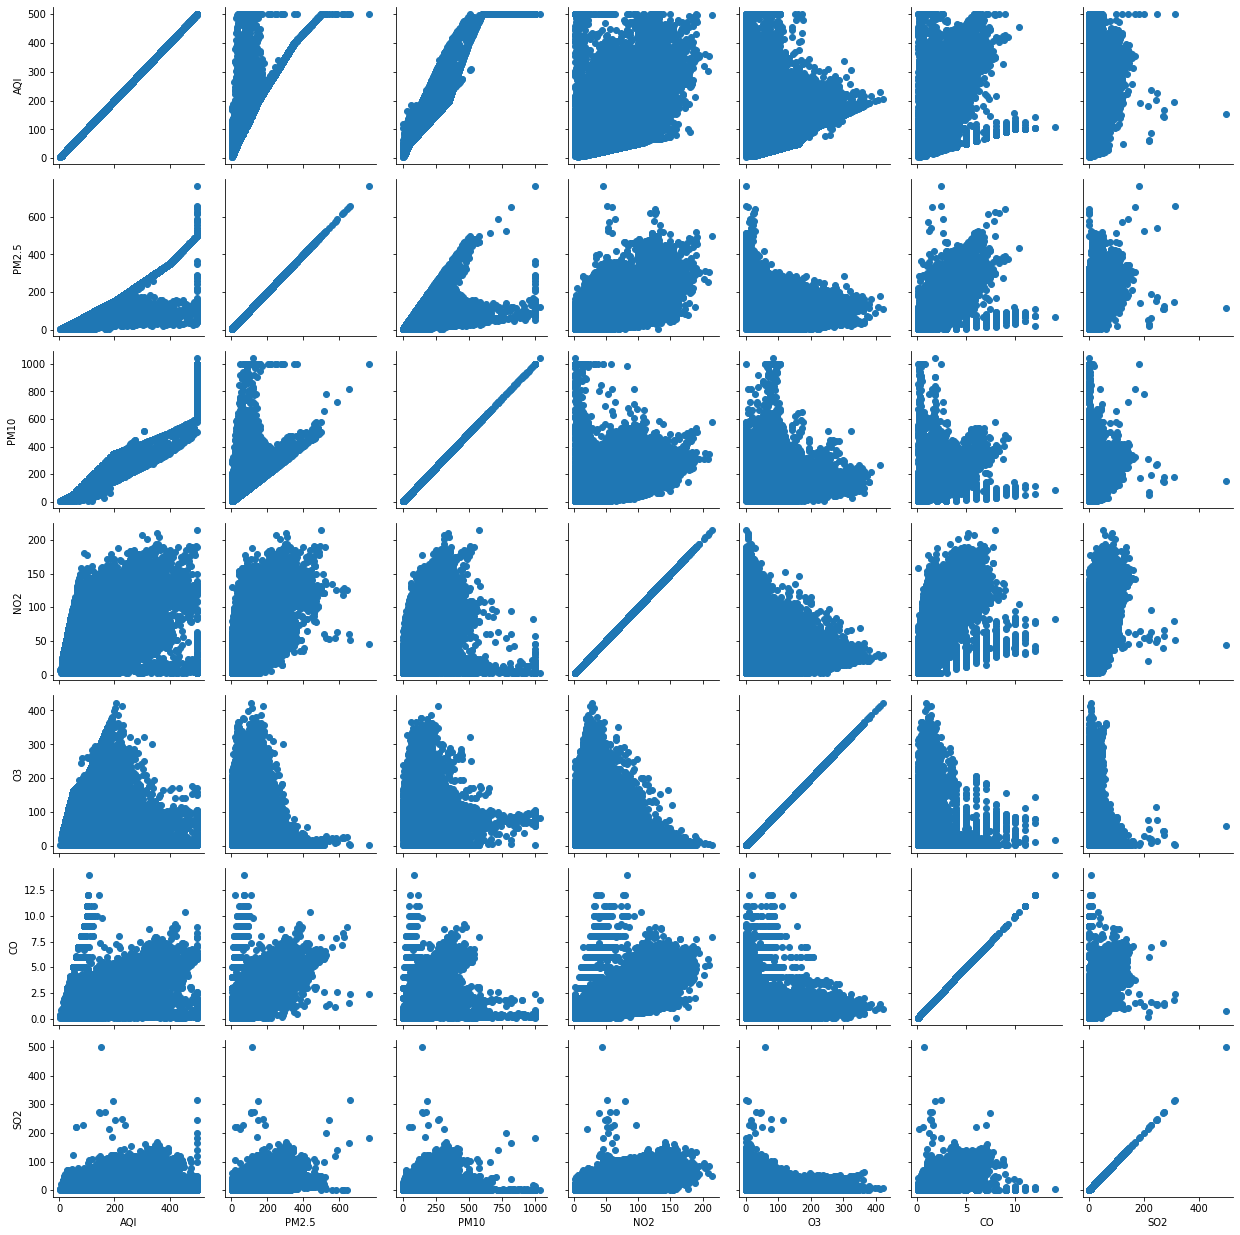

In [25]:
co_data = data[['AQI', 'PM2.5', 'PM10', 'NO2', 'O3', 'CO', 'SO2']]
g = sns.PairGrid(co_data)
g.map(plt.scatter)

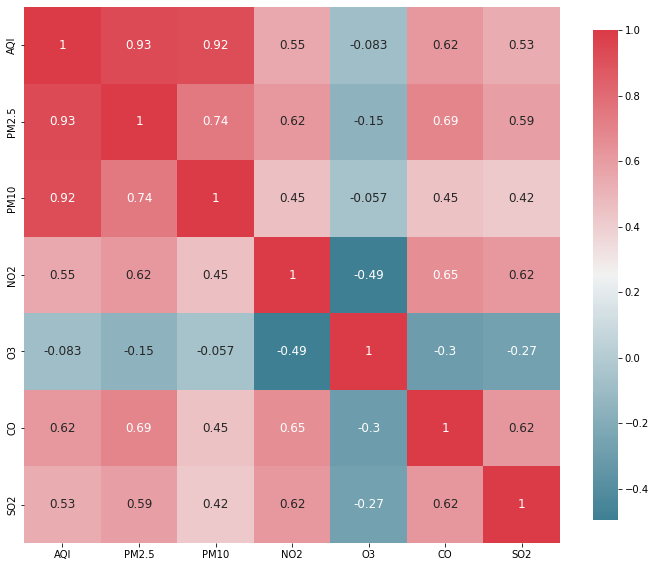

In [27]:
## heat map for correlation 
def plot_corr_map(df):
    corr=df.corr()
    _,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220, 10, as_cmap=True)
    _=sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink':0.9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize':12}
    )
plot_corr_map(co_data)

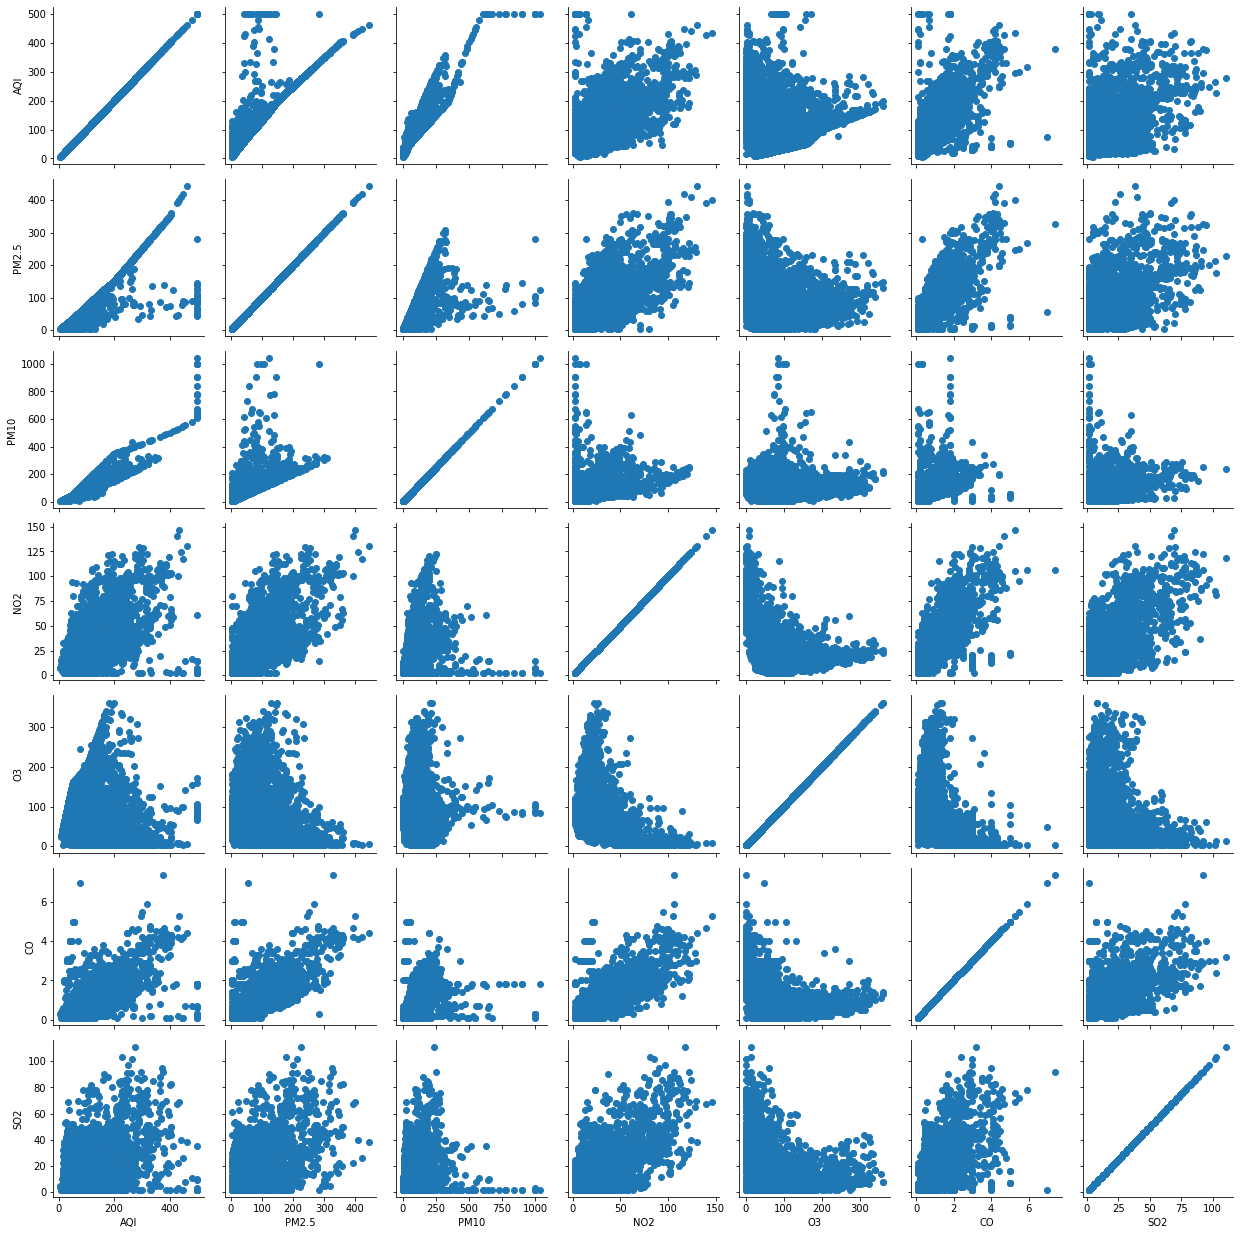

In [28]:
## A3 station
co_data_A3 = data_A3[['AQI', 'PM2.5', 'PM10', 'NO2', 'O3', 'CO', 'SO2']]
g = sns.PairGrid(co_data_A3)
g.map(plt.scatter)

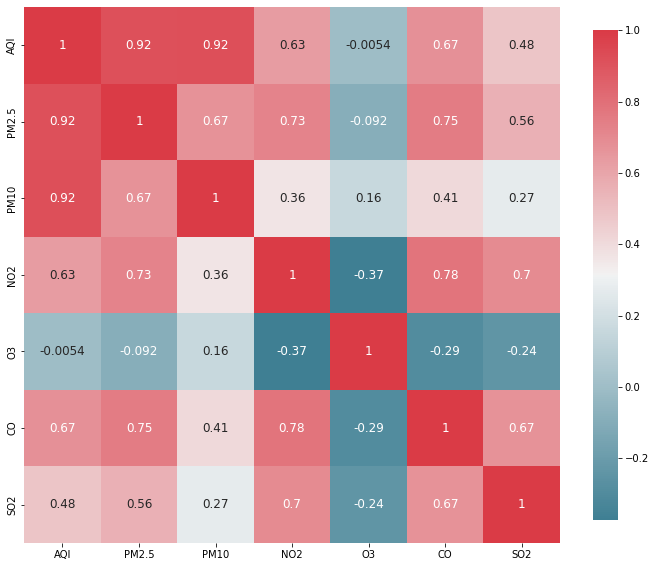

In [29]:
plot_corr_map(co_data_A3)

# Data preprocessing
## Processing missing value

In [40]:
data_new = data.drop(['datetime','O3','date','time'], axis=1)
data_new

,STATIONNAME,AQI,PM2.5,PM10,NO2,CO,SO2,month,day,hour,week
0,A1,145.0,111.0,140.0,102.0,2.7,61.0,1,2,1,1
1,A2,130.0,99.0,177.0,64.0,3.0,44.0,1,2,1,1
2,A3,85.0,34.0,120.0,10.0,0.4,10.0,1,2,1,1
3,A4,109.0,82.0,154.0,90.0,3.4,46.0,1,2,1,1
4,A5,127.0,96.0,132.0,89.0,3.4,62.0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
65455,A8,19.0,5.0,5.0,2.0,0.5,2.0,8,31,23,36
65456,A9,24.0,9.0,NaN,17.0,0.5,2.0,8,31,23,36
65457,A10,21.0,6.0,18.0,5.0,0.4,2.0,8,31,23,36
65458,A11,22.0,8.0,NaN,26.0,0.6,2.0,8,31,23,36


In [41]:
## null value processing
nans=pd.isnull(data_new).sum()
nans[nans>0]

AQI       1342
PM2.5     2092
PM10     19152
NO2       2213
CO        1700
SO2       1708
dtype: int64

In [42]:
data_new['AQI'] = data_new['AQI'].fillna(data_new['AQI'].mean())
data_new['PM2.5'] = data_new['PM2.5'].fillna(data_new['PM2.5'].mean())
data_new['NO2'] = data_new['NO2'].fillna(data_new['NO2'].mean())
data_new['CO'] = data_new['CO'].fillna(data_new['CO'].mean())
data_new['SO2'] = data_new['SO2'].fillna(data_new['SO2'].mean())

In [43]:
nans=pd.isnull(data_new).sum()
nans[nans>0]

PM10    19152
dtype: int64

In [58]:
## using random forset by modeling to fill the null value.
from sklearn.ensemble import RandomForestRegressor
def fill_missing_PM10(df):
    temp=df[['PM10', 'AQI', 'PM2.5', 'NO2', 'CO', 'SO2']]
    ## split known PM10 features part and unknown PM10 features part.
    ## !!!! as_matrix() was depreciated. using values
    known=temp[temp.PM10.notnull()].values
    unknown=temp[temp.PM10.isnull()].values
    ## regard known as training set.
    ## X is features
    X = known[:, 1:]
    ## y is target just PM10
    y = known[:, 0]
    ## fit to Random Forest model
    rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    ## using trained model rfr to predicted unknown PM10 value
    predicted = rfr.predict(unknown[:,1:])
    ## filling the missing value by predicted result
    df.loc[df.PM10.isnull(), "PM10"] = predicted
    return df, rfr

In [59]:
data_new, rfr = fill_missing_PM10(data_new)

In [60]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65460 entries, 0 to 65459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATIONNAME  65460 non-null  object 
 1   AQI          65460 non-null  float64
 2   PM2.5        65460 non-null  float64
 3   PM10         65460 non-null  float64
 4   NO2          65460 non-null  float64
 5   CO           65460 non-null  float64
 6   SO2          65460 non-null  float64
 7   month        65460 non-null  int64  
 8   day          65460 non-null  int64  
 9   hour         65460 non-null  int64  
 10  week         65460 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 5.5+ MB


## Vectorizing numerical value features

In [61]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
## Dictionary key and values
data_feature_con = data_new[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'month', 'day', 'week', 'hour']]
X_con = data_feature_con.T.to_dict().values()

In [68]:
## vectorizing the features
vec = DictVectorizer(sparse=False)
X_con_vec = vec.fit_transform(X_con)

In [70]:
X_con_vec[0]

array([  2.7, 102. , 140. , 111. ,  61. ,   2. ,   1. ,   1. ,   1. ])

In [71]:
## normalizing the con features
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0, 1))
X_con_vec = scalar.fit_transform(X_con_vec)
X_con_vec

array([[0.18705036, 0.47169811, 0.13043478, ..., 0.04347826, 0.        ,
        0.        ],
       [0.20863309, 0.29245283, 0.16618357, ..., 0.04347826, 0.        ,
        0.        ],
       [0.02158273, 0.03773585, 0.11111111, ..., 0.04347826, 0.        ,
        0.        ],
       ...,
       [0.02158273, 0.01415094, 0.01256039, ..., 1.        , 1.        ,
        1.        ],
       [0.03597122, 0.11320755, 0.01320169, ..., 1.        , 1.        ,
        1.        ],
       [0.02877698, 0.08018868, 0.01568035, ..., 1.        , 1.        ,
        1.        ]])

## multiple classes processing by One-hot

In [74]:
## processing STATIONNAME by One-hot encoding
dummies_cat_features=pd.get_dummies(data_new['STATIONNAME'])
dummies_cat_features=dummies_cat_features.rename(columns=lambda x: "STATIONNAME_"+str(x))
dummies_cat_features.head()

,STATIONNAME_A1,STATIONNAME_A10,STATIONNAME_A11,STATIONNAME_A12,STATIONNAME_A2,STATIONNAME_A3,STATIONNAME_A4,STATIONNAME_A5,STATIONNAME_A6,STATIONNAME_A7,STATIONNAME_A8,STATIONNAME_A9
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
X_cat = dummies_cat_features.T.to_dict().values()
X_cat_vec = vec.fit_transform(X_cat)

In [76]:
X_cat_vec

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## combine the numerical value features and One-hot features

In [77]:
X_vec = np.concatenate((X_con_vec, X_cat_vec), axis=1)
X_vec

array([[0.18705036, 0.47169811, 0.13043478, ..., 0.        , 0.        ,
        0.        ],
       [0.20863309, 0.29245283, 0.16618357, ..., 0.        , 0.        ,
        0.        ],
       [0.02158273, 0.03773585, 0.11111111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02158273, 0.01415094, 0.01256039, ..., 0.        , 0.        ,
        0.        ],
       [0.03597122, 0.11320755, 0.01320169, ..., 0.        , 0.        ,
        0.        ],
       [0.02877698, 0.08018868, 0.01568035, ..., 0.        , 0.        ,
        0.        ]])

## similarly, processing AQI 

In [100]:
data_new['AQI'].values.astype(float)

array([[145.],
       [130.],
       [ 85.],
       ...,
       [ 21.],
       [ 22.],
       [ 25.]])

In [105]:
## vectorizing AQI values
## converting 1d to 65460d array
Y_vec = data_new['AQI'].values.astype(float).reshape(-1, 1)
## Min-Max rescaling AQI
Y_vec = scalar.fit_transform(Y_vec)
## converting 65460d to 1d array back
Y_vec = Y_vec.flatten()
Y_vec

array([0.28427419, 0.25403226, 0.16330645, ..., 0.03427419, 0.03629032,
       0.04233871])

# Modeling

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X_vec,Y_vec, test_size=0.3, random_state=0)

In [110]:
X_train.shape, y_train.shape

((45822, 21), (45822,))

In [112]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [125]:
def model_evaluation(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pr = model.predict(X_te)
    ## print result 
    print("Correlation Coefficient: {}".format(np.corrcoef(y_te, y_pr)))
    print("----------------------------")
    print("RMSE:{}".format(np.sqrt(metrics.mean_squared_error(y_te, y_pr))))
    print("----------------------------")
    print("Determination Coefficient(R2). Train score:{}. Test score:{}".format(model.score(X_tr, y_tr), model.score(X_te, y_te)))
    print("----------------------------")
    scores = cross_val_score(model, X_tr, y_tr, cv=10)
    print("Cross-validation score:{}".format(scores.mean()))
    return model, y_pr

## Linear Regression

In [126]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
m, y_predict_linear = model_evaluation(lr,X_train,y_train, X_test,y_test)

Correlation Coefficient: [[1.         0.98070864]
 [0.98070864 1.        ]]
----------------------------
RMSE:0.03108723652151289
----------------------------
Determination Coefficient(R2). Train score:0.9627137927035445. Test score:0.9617724699312418
----------------------------
Cross-validation score:0.9626385010346867


In [119]:
y_predict_linear

array([0.28224182, 0.04238892, 0.2651062 , ..., 0.05912781, 0.04983521,
       0.04827881])

## Decision Tree Regression

In [127]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model_evaluation(dtr, X_train,y_train, X_test,y_test)

Correlation Coefficient: [[1.         0.99553194]
 [0.99553194 1.        ]]
----------------------------
RMSE:0.015025618452528967
----------------------------
Determination Coefficient(R2). Train score:1.0. Test score:0.9910694806299771
----------------------------
Cross-validation score:0.9906110719523111


(DecisionTreeRegressor(),
 array([0.26008065, 0.03427419, 0.28830645, ..., 0.0625    , 0.03225806,
        0.03225806]))

## Random Forest Regression

In [131]:
from sklearn.ensemble import RandomForestRegressor 
rfc = RandomForestRegressor(n_estimators=100, bootstrap = True)
model_evaluation(rfc, X_train,y_train, X_test,y_test)

Correlation Coefficient: [[1.        0.9977917]
 [0.9977917 1.       ]]
----------------------------
RMSE:0.010570907707250849
----------------------------
Determination Coefficient(R2). Train score:0.9993746320716904. Test score:0.9955798544957897
----------------------------
Cross-validation score:0.9954502926219817


(RandomForestRegressor(),
 array([0.26008065, 0.03564516, 0.28830645, ..., 0.04991935, 0.03405242,
        0.03602823]))

## Ensemble - Extra Random Tress Regression

In [132]:
## Extra tress is a kind of bagging method. 
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=50, random_state=np.random.RandomState(1))
model_evaluation(etr, X_train,y_train, X_test,y_test)

Correlation Coefficient: [[1.         0.99801525]
 [0.99801525 1.        ]]
----------------------------
RMSE:0.010023522949104028
----------------------------
Determination Coefficient(R2). Train score:1.0. Test score:0.9960257719728738
----------------------------
Cross-validation score:0.9959288759709123


(ExtraTreesRegressor(n_estimators=50,
                     random_state=RandomState(MT19937) at 0x23EC0AC9A40),
 array([0.26040323, 0.03443548, 0.28830645, ..., 0.04883065, 0.03306452,
        0.03483871]))